<a href="https://colab.research.google.com/github/Fellylove/bioinformatics_algorithms_coursera/blob/master/week1_module11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=b38f4d81690676a089fa50f86740b5f449a81db2485e7083116086bce6070be4
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ads1_week4_reads.fq

--2022-01-20 00:49:01--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ads1_week4_reads.fq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.224.2.8, 13.224.2.54, 13.224.2.74, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.224.2.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 395781 (387K) [video/m2ts]
Saving to: ‘ads1_week4_reads.fq’

ads1_week4_reads.fq 100%[===================>] 386.50K  --.-KB/s    in 0.02s   

2022-01-20 00:49:01 (15.4 MB/s) - ‘ads1_week4_reads.fq’ saved [395781/395781]



In [ ]:
#read genome from fasta read

def  readGenome (filename):
  genome = ''
  with open(filename, 'r') as f:
    for line in f:
      if not line[0] == '>':
        genome += line.rstrip()
  return genome

In [ ]:
genome = readGenome("ads1_week4_reads.fq")

In [ ]:
len(genome)

388257

In [ ]:
from collections import Counter

count = collections.counter(genome)
print

##Programming Homework 1 Instructions (Read First)

In [24]:
# naive exact matching algorithm:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences


In [25]:
# reverse complement

def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [26]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [27]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [23]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2022-01-21 02:21:11--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.84.221.168, 99.84.221.117, 99.84.221.66, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.84.221.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.1’

lambda_virus.fa.1   100%[===================>]  48.12K  --.-KB/s    in 0.02s   

2022-01-21 02:21:12 (2.13 MB/s) - ‘lambda_virus.fa.1’ saved [49270/49270]



In [29]:
# how many times does AGGT or it's reverse complement ACCA occur in the lambda virus

lambda_genome = readGenome('lambda_virus.fa.1')

print(lambda_genome[:100])

GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC


In [34]:
print(len(naive('AGGT', lambda_genome)))

150


In [47]:
def occurGenome (seq, genome):

  occurSeq = len(naive(seq, genome))
  occurReverse = len(naive(reverseComplement(seq), genome))

  if occurSeq == occurReverse:
    return occurSeq
  elif occurSeq != occurReverse:
    return (occurSeq + occurReverse)

In [49]:
#seq = 'AGGT' #answer 306
seq = 'TTAA'
reverseSeq = 'ACCT'
genome = lambda_genome

occurs= occurGenome(seq, genome)
print(occurs)

195


In [45]:
print(len(naive('ACCT', genome))) #150 +156 = 306

156


In [44]:
count = 0
count += len(naive('AGGT', genome))
count += len(naive(reverseComplement('AGGT'), genome))
print(count)

306


In [50]:
count = len(naive('TTAA', genome))
print(count)

195


question5 = '''As we will discuss, sometimes we would like to find approximate matches for P in T.
That is, we want to find occurrences with one or more differences.
For Questions 5 and 6, make a new version of the naive function called naive_2mm
that allows up to 2 mismatches per occurrence. Unlike for the previous questions,
do not consider the reverse complement here. We're looking for approximate matches for P itself,
not its reverse complement.
For example, ACTTTA occurs twice in ACTTACTTGATAAAGT, once at offset 0 with 2 mismatches,
and once at offset 4 with 1 mismatch. So naive_2mm(’ACTTTA’,’ACTTACTTGATAAAGT’)
should return the list [0,4].
How many times does TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches?'''
print(question5)

In [54]:
!wget --no-check Question https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2022-01-21 04:29:20--  http://question/
Resolving question (question)... failed: Name or service not known.
wget: unable to resolve host address ‘question’
--2022-01-21 04:29:20--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.32.84.31, 13.32.84.169, 13.32.84.71, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.32.84.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K  --.-KB/s    in 0.1s    

2022-01-21 04:29:21 (2.29 MB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]

FINISHED --2022-01-21 04:29:21--
Total wall clock time: 0.5s
Downloaded: 1 files, 236K in 0.1s (2.29 MB/s)


In [ ]:
## allows for two mismatches


def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        mismatch = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                mismatch += 1
                if mismatch > 2:
                    break
        if mismatch <= 2:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [55]:
seq, qual = readFastq('ERR037900_1.first1000.fastq')
print(seq[:5])
print(qual[:5])
print(len(seq[0]))

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTNACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAAACCTAACC']
['HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHEHHBA#C>@54455C/7=CGHEGEB;C############', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHHHHHDHHHDEHHHHFGIHEHEGGGF4#45655366GIGEHAGBG################', 'HHHHHHHHHHHHHHHHHHHHHHHHHIHHHHHHHHHHHHHHHHHHHHHHIHHHHHIHFHHHIHHHHD#ECA54655GGIBH?BD@+BCBF?5A=::>8?##', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIHEHHIGHIFFH

In [56]:
def QtoPhred33(Q):
    '''Turn Q into Phred+33 ASCII-­‐encoded quality'''
    return chr(Q + 33) # converts character to integer according to ASCII table

def phred33ToQ(qual):
    '''Turn Phred+33 ASCII-encoded quality into Q'''
    return ord(qual) - 33 # converts integer to character according to ASCII table

def createHistory(qualities):
    history = [0] * 50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            history[q] += 1
    return history
h = createHistory(qual)
print(h)

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Using matplotlib backend: agg


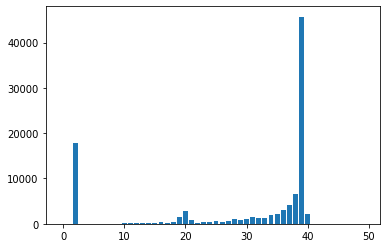

In [57]:
%matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()